# Google Play Store Sentiment Analysis using Python

Sentiment analysis is the classification of a customer’s reviews or comments as positive, negative, and sometimes neutral also. Most businesses analyze their customers’ feelings about their products or services to find out what their customers want from them. Google play store has millions of apps with their reviews, so it will be a good use case of sentiment analysis to analyze the sentiment of apps available on the google play store. So, in this article, I will walk you through the task of Google Play Store sentiment analysis using Python.

# Google Play Store Sentiment Analysis

Google Play Store can be found on all Android smartphones and tablets. This is the official Google app store for the Android operating system. It has millions of apps with their reviews so that we can use such an amount of data for any data science task. Analyzing a customer’s reviews and comments is what we do in the Sentiment Analysis task. Having said that, in the section below, I will walk you through the Google Play Store Sentiment Analysis task using Python. The dataset I am using in this task can be downloaded from here.

I’ll start this task by reading the dataset. The dataset I am using here is downloaded from Kaggle which was collected from the Google Play Store. So let’s start this task by reading the dataset:

# Import Necessary Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.util import pr
from itertools import count
%matplotlib inline

# Data Collection

In [26]:
data = pd.read_csv('./data/user_reviews.csv')
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [27]:
print(data.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


# Data Preprocessing

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [29]:
data.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


Before moving forward, let’s have a look at whether this dataset contains any missing values or not

In [30]:
data.isnull()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,True,True,True
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64290,False,True,True,True,True
64291,False,True,True,True,True
64292,False,True,True,True,True
64293,False,True,True,True,True


In [31]:
print(data.isnull())

         App  Translated_Review  Sentiment  Sentiment_Polarity  \
0      False              False      False               False   
1      False              False      False               False   
2      False               True       True                True   
3      False              False      False               False   
4      False              False      False               False   
...      ...                ...        ...                 ...   
64290  False               True       True                True   
64291  False               True       True                True   
64292  False               True       True                True   
64293  False               True       True                True   
64294  False               True       True                True   

       Sentiment_Subjectivity  
0                       False  
1                       False  
2                        True  
3                       False  
4                       False  
...            

In [32]:
data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

So it has some null values, I will create a new dataset by dropping the null values

In [33]:
data = data.dropna()
data.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Now to analyze the sentiments of the google play store reviews, I will add three new columns in the dataset by understanding the sentiments of each customer review as Positive, Negative, and Neutral

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Translated_Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Translated_Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Translated_Review"]]
print(data.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  Positive  Negative  \
0  Positive                1.00                0.533333     0.534       0.0   
1  Positive                0.25                0.288462     0.519       0.0   
3  Positive                0.40                0.875000     0.451       0.0   
4  Positive                1.00                0.300000     0.677       0.0   
5  Positive                1.00                0.300000     0.808       0.0   

   Neutral  
0    0.466  
1    0.481  
3    0.549 

So now as a final step let’s have a look at the sentiments of customers about the applications available at the Google play store by using a scatter plot

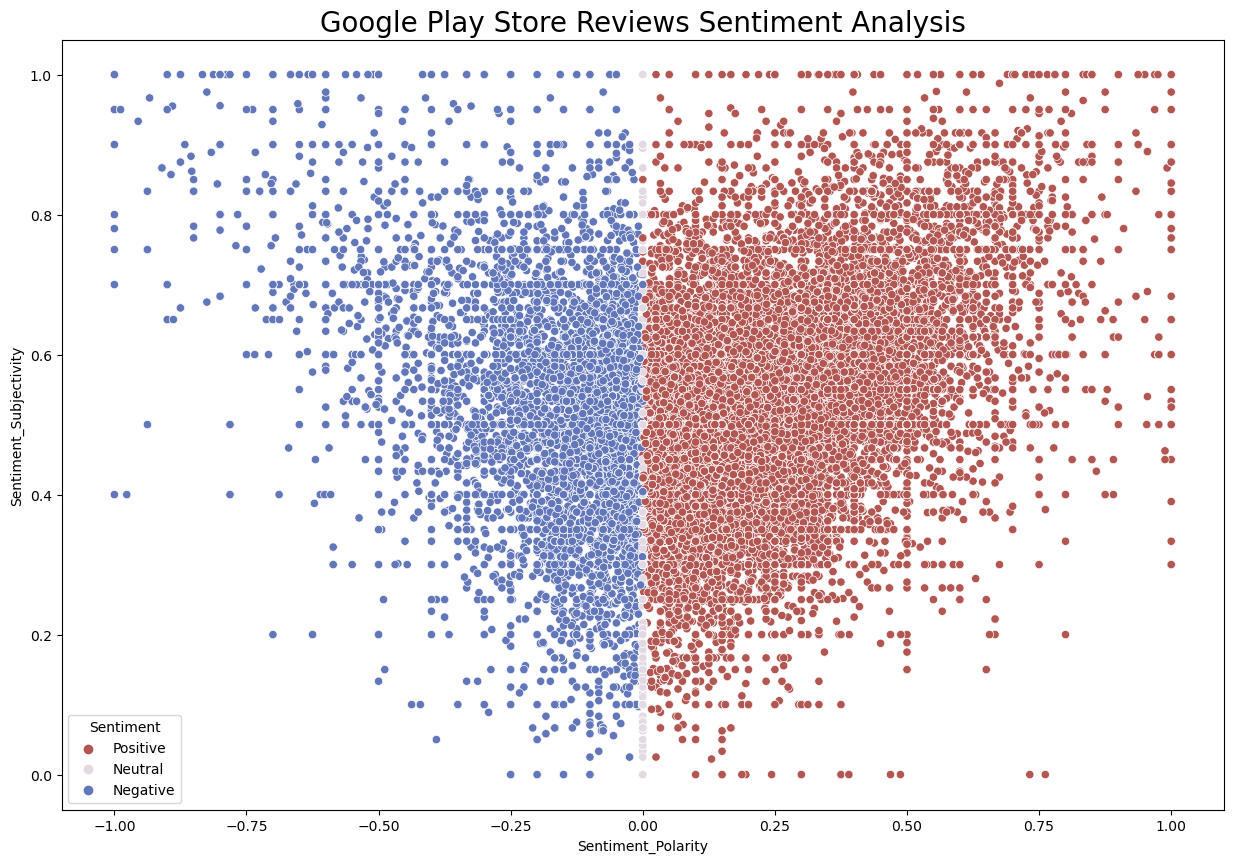

In [40]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = data['Sentiment_Polarity'], y = data['Sentiment_Subjectivity'], 
                hue = data['Sentiment'], edgecolor='white', palette="twilight_shifted_r")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

# Summary

So this is how we can analyze the sentiments of google play store reviews. Sentiment analysis is the classification of a customer’s reviews or comments as positive, negative, and neutral. I hope you liked this article on the task of analyzing the sentiments of the Google play store using Python. Feel free to ask your valuable questions in the comments section below.

# Sheikh Rasel Ahmed

#### Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast

##### LinkedIn - https://www.linkedin.com/in/shekhnirob1
##### GitHub - https://github.com/Rasel1435